In [1]:
import pandas as pd
import networkx as nx

In [2]:
from iac_sketch import data, etl, sketch, transform, system_tests

In [3]:
# DEBUG
import importlib

importlib.reload(data)
importlib.reload(etl)
importlib.reload(sketch)
importlib.reload(transform)
importlib.reload(system_tests)
# architect = sketch.Architect("../public/components")
# registry = architect.parse()

<module 'iac_sketch.system_tests' from '/Users/zhafen/repos/iac-sketch/iac_sketch/system_tests.py'>

In [4]:
architect = sketch.Architect()
registry = architect.perform_registry_etl()
tests, test_results = architect.validate_registry()
tests

,test.comp_ind,test.value,code.value,errors,test_passed
entity,,,,,
test_executes_tests,1,<NA>,NaN,<NA>,<NA>
test_fully_connected,1,<NA>,iac_sketch.system_tests.test_connected,,False
test_fully_defined,1,<NA>,iac_sketch.system_tests.test_defined,,False
test_fully_designed,1,<NA>,iac_sketch.system_tests.test_designed,,False
test_fully_implemented,1,<NA>,iac_sketch.system_tests.test_implemented,,False
test_perform_registry_etl,1,<NA>,NaN,<NA>,<NA>


In [5]:
with pd.option_context('display.max_colwidth', None):
    print(tests.query("errors.notna() and errors != ''")["errors"])

Series([], Name: errors, dtype: object)


In [6]:
# Show results
for test_key, test_result in test_results.items():
    print(f"{test_key}:")
    display(test_result)
    print("")

test_fully_connected:


,connected_component_group,comp_ind
entity,,
alternative_to,9,6
apply_postprocess_transforms,3,0
apply_preprocess_transforms,3,6
apply_system_transforms,3,3
apply_transform,1,2
apply_transforms,10,4
can_document_workflows,11,3
can_execute_tests,2,3
can_perform_registry_etl,4,3



test_fully_defined:


,comp_ind,multiplicity,unparsed_fields,is_defined,fields,is_valid,errors
entity,,,,,,,
subtask,0,0..*,{},False,"{'entity': <Schema Field(name=entity, type=Dat...",False,Component definition does not exist.
subtask_of,0,0..*,{},False,"{'entity': <Schema Field(name=entity, type=Dat...",False,Component definition does not exist.



test_fully_designed:


,entity,comp_ind,value,link_type,source,target
0,can_document_workflows,1,iac_sketch_infrastructure,NaN,NaN,NaN
9,minimal_workflow_orchestration_functionality,1,iac_sketch_infrastructure,NaN,NaN,NaN
10,minimizes_structure_repetition,1,iac_sketch_infrastructure,NaN,NaN,NaN



test_fully_implemented:


,entity,comp_ind,value,link.link_type,link.source,link.target,status.comp_ind,status.value
0,can_document_workflows,1,iac_sketch_infrastructure,NaN,NaN,NaN,NaN,NaN
1,can_execute_tests,1,iac_sketch_infrastructure,satisfies,executes_tests,can_execute_tests,NaN,NaN
2,can_execute_tests,1,iac_sketch_infrastructure,satisfies,test_executes_tests,can_execute_tests,NaN,NaN
3,can_perform_registry_etl,1,iac_sketch_infrastructure,satisfies,perform_registry_etl,can_perform_registry_etl,NaN,NaN
4,can_perform_registry_etl,1,iac_sketch_infrastructure,satisfies,test_perform_registry_etl,can_perform_registry_etl,NaN,NaN
5,fully_connected,1,NaN,satisfies,test_fully_connected,fully_connected,4.0,in development
6,fully_defined,1,NaN,satisfies,test_fully_defined,fully_defined,4.0,in development
7,fully_designed,1,NaN,satisfies,test_fully_designed,fully_designed,4.0,in development
8,fully_implemented,1,NaN,satisfies,test_fully_implemented,fully_implemented,4.0,in development
9,minimal_workflow_orchestration_functionality,1,iac_sketch_infrastructure,NaN,NaN,NaN,NaN,NaN


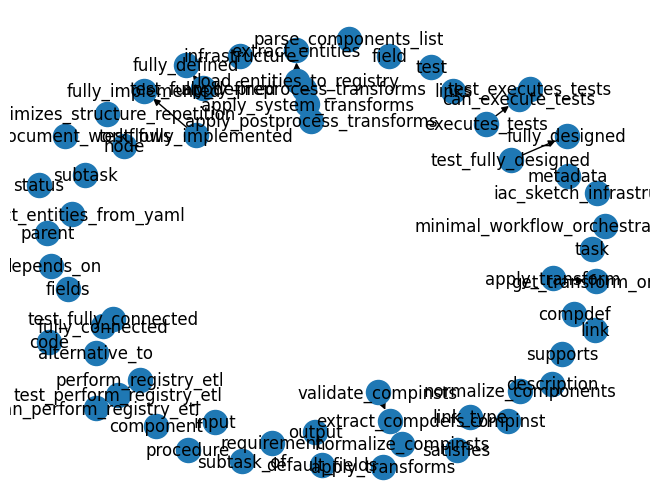

In [7]:
# Visualize the graph
nx.draw(registry.graph, with_labels=True)

In [8]:
import ast

In [9]:
with open("../iac_sketch/etl.py", "r") as f:
    source = f.read()
tree = ast.parse(source)
tree

In [ ]:
node = ast.parse("""
def my_function(x) -> int:
    return x + 1
""")

In [22]:
node._fields

('body', 'type_ignores')

In [34]:
node.body[0].__class__.__name__

'FunctionDef'

In [33]:
node.body[0]._fields

('name',
 'args',
 'body',
 'decorator_list',
 'returns',
 'type_comment',
 'type_params')

In [32]:
node.body[0].body[0].value._fields

('left', 'op', 'right')

In [ ]:
visitor = ComponentVisitor()

In [ ]:
visitor.visit(tree)

In [ ]:
pd.DataFrame(visitor.components)

In [ ]:
type(tree.body[-1])

In [ ]:
dict(ast.iter_fields(child_node))

In [ ]:
components = []
for child_node in ast.iter_child_nodes(tree.body[-1]):
    comp_i = {
        "component_type": type(child_node).__name__
    }
    components.append(comp_i)

components

In [ ]:
tree.body[-1].__dir__()

In [ ]:
for item in ast.iter_fields(tree.body[-1].body[-1]):
    print(item)

In [ ]:
visitor.visit(tree.body[-1])

In [ ]:
ast.walk(visitor.visit(tree))

In [ ]:
for item in ast.walk(tree):
    print(item)

In [ ]:
visitor.visit_Constant(tree)

In [ ]:
components = {}
for field, value in ast.iter_fields(tree):
    print(field, value)
    if isinstance(value, str)

In [ ]:
for item in ast.iter_child_nodes(transform_sys_tree):
    print(item)

In [ ]:
ast.get_source_segment(source, transform_sys_tree)

In [ ]:
ast.get_docstring(transform_sys_tree)

In [ ]:
isinstance(transform_sys_tree, ast.AST)